# Heart Failure Prediction
**By**

 **Veera Narasimha Rao Maradapudi**

### Introduction 
Heart failure is a chronic condition in which the heart's ability to pump blood is inadequate to meet the body's needs. It is a major public health concern, affecting millions of people worldwide and leading to significant morbidity and mortality. Early prediction and effective management of heart failure can greatly improve patient outcomes and reduce healthcare costs. In this project, we aim to build a classification model to predict the occurrence of a death event (DEATH_EVENT) in patients with heart failure using clinical and laboratory data.

The dataset used in this project, obtained from the UCI Machine Learning Repository, consists of 299 patient records and includes 13 features such as age, anemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, sex, smoking, time, and the target variable DEATH_EVENT. This dataset provides a comprehensive set of predictors that can be used to develop a robust predictive model.

### Dataset 
This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has these 13 clinical features.

age: Age of the patient [Integer] 

anaemia: Decrease of red blood cells or hemoglobin [Binary] 

creatinine_phosphokinase: Level of the CPK enzyme in the blood [Integer] 

diabetes: If the patient has diabetes [Binary] 

ejection_fraction: Percentage of blood leaving the heart at each contraction [Integer] 

high_blood_pressure: If the patient has hypertension [Binary] 

platelets: Platelets in the blood [Continuous] 

serum_creatinine: Level of serum creatinine in the blood [Continuous] 

serum_sodium: Level of serum sodium in the blood [Integer] 

sex: Sex of the patient [Binary]

smoking: if the patient smokes or not [Binary]

time: follow-up period [Integer]

death_event: if the patient died during the follow-up period [Binary] 

The target variable in the dataset is death_event. Rest all are features.

In [1]:
#Import the needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

#### Step 1: Load the dataset

In [2]:
# Load the dataset
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Step 2: Basic Data Exploration to get a basic understanding of the dataset

In [3]:
# Basic Data Exploration
print(heart_data.head())
print(heart_data.info())
print(heart_data.describe())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

#### Interpretation
The ages range from 40 to 95 years, with an average age of approximately 61 years. The distribution suggests that the middle 50% of ages fall between 51 and 70 years.

Anaemia is a binary variable where 0 indicates absence and 1 indicates presence. Approximately 43.1% of the individuals have anaemia.

CPK levels vary widely, with a high standard deviation indicating significant variability. The median is much lower than the mean, suggesting a right-skewed distribution with some extremely high values.

Diabetes is also a binary variable. About 41.8% of the individuals have diabetes.

Ejection fraction values, representing the percentage of blood leaving the heart each time it contracts, range from 14% to 80%, with an average of 38.08%.

High blood pressure is a binary variable. Approximately 35.1% of individuals have high blood pressure.

Platelet counts have a wide range, with a mean of approximately 263,358 per µL. The distribution seems quite spread out with a significant standard deviation.

Serum creatinine levels range from 0.5 to 9.4 mg/dL, with an average of 1.394 mg/dL, indicating kidney function variability among the individuals.

Serum sodium levels are relatively stable, ranging from 113 to 148 mmol/L, with an average of 136.63 mmol/L.

Sex is a binary variable where 0 might represent female and 1 male. About 64.9% of the individuals are male.

Smoking is a binary variable with 32.1% of the individuals being smokers.

Time variable likely represents the follow-up period in days, ranging from 4 to 285 days with an average of 130.26 days.

Death event is a binary outcome where 0 represents survival and 1 represents death. About 32.1% of the individuals experienced a death event during the follow-up period.


#### Step 3: Check for Missing Values

In [4]:
# Check for Missing / Null  Values
print(heart_data.isnull().sum())


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


#### Step 4: Do Univariate Analysis to analyze each feature individually

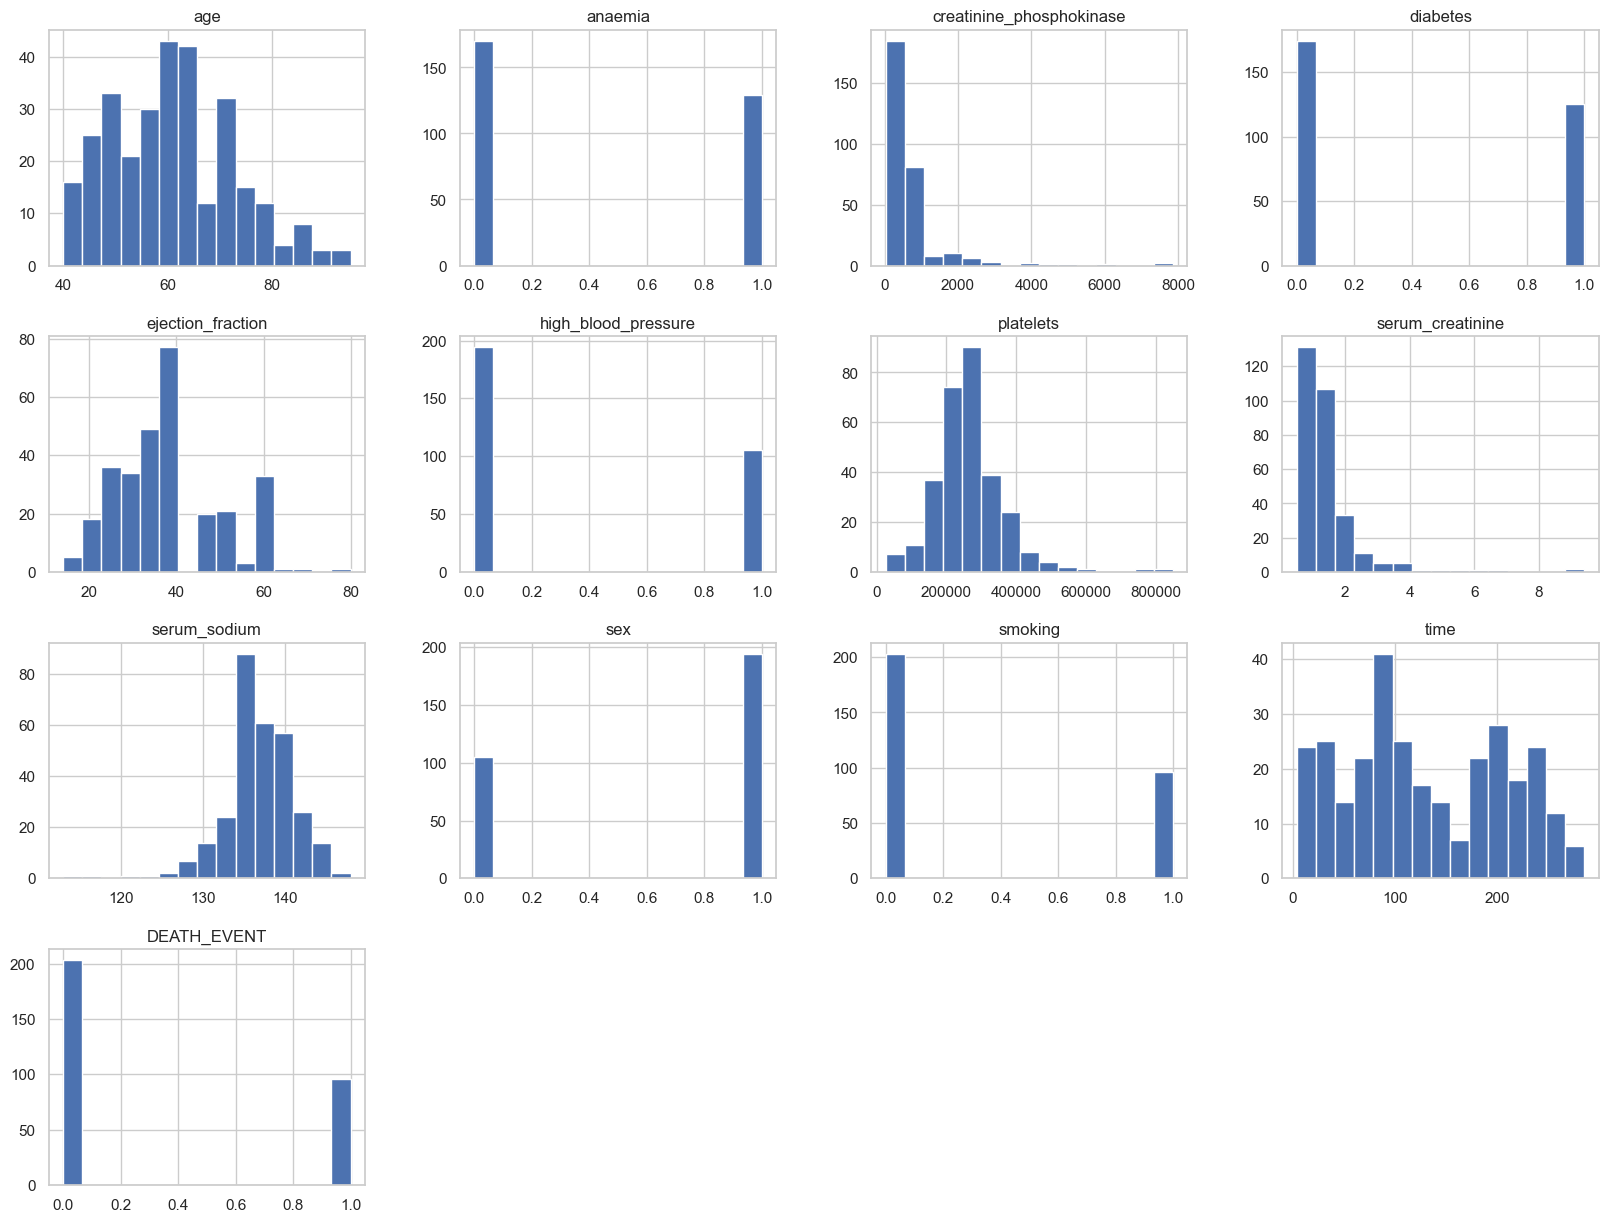

In [5]:
# Univariate Analysis
sns.set(style="whitegrid")
heart_data.hist(bins=15, figsize=(20, 15))
plt.show()

#### Interpretation
The target variable DEATH_EVENT is imbalanced as seen above. So DEATH_EVENT value 1 has to be upsampled .

#### Step 5: Do Bivariate Analysis  to explore relationships between features and the target variable

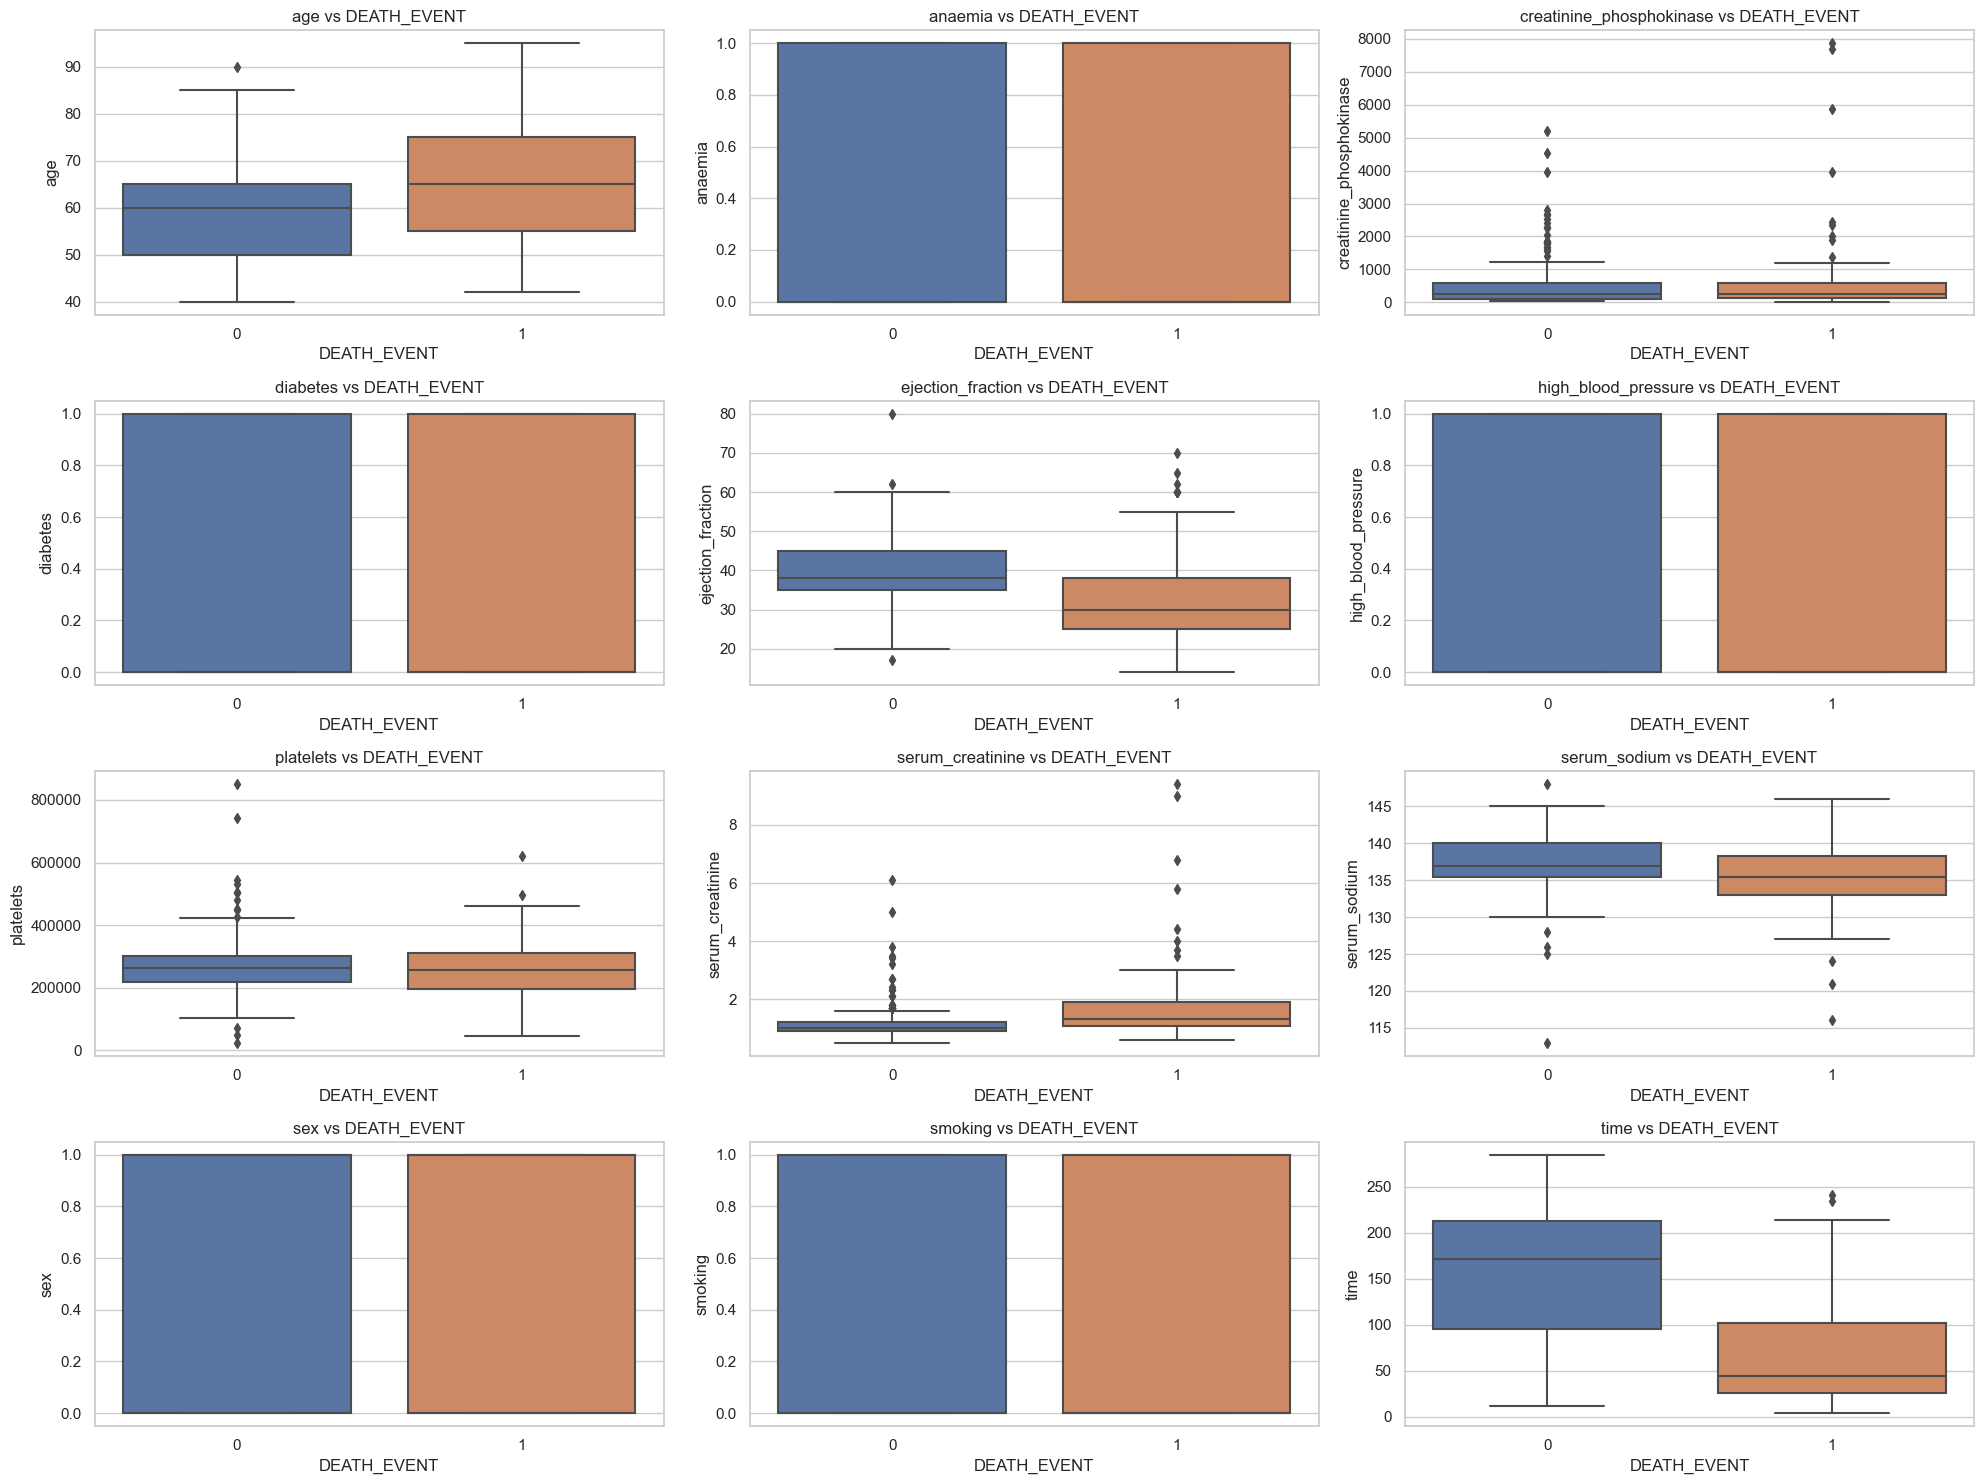

In [6]:
# Bivariate Analysis
numerical_features = heart_data.drop(columns='DEATH_EVENT').select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=heart_data)
    plt.title(f'{feature} vs DEATH_EVENT')
plt.tight_layout()
plt.show()

#### Interpretation
Eventhough there are Outliers as seen from Bivariate analysis , we are retaining as it is small data and it refers to health records . Retaining these extreme values will help us capture all the trends and distribution in data which is needed for model building.

#### Step 6: Do Upsampling for Death_Event = 1 

In [7]:
# Separate the majority and minority classes
heart_data_majority = heart_data[heart_data.DEATH_EVENT == 0]
heart_data_minority = heart_data[heart_data.DEATH_EVENT == 1]
# Upsample the minority class
heart_data_minority_upsampled = resample(heart_data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=heart_data_majority.shape[0],    # to match majority class
                                 random_state=42)  # reproducible results
# Combine the majority class with the upsampled minority class
heart_data_upsample = pd.concat([heart_data_majority, heart_data_minority_upsampled])

#### Step 7: Do Correlation Analysis to analyze the correlation between features

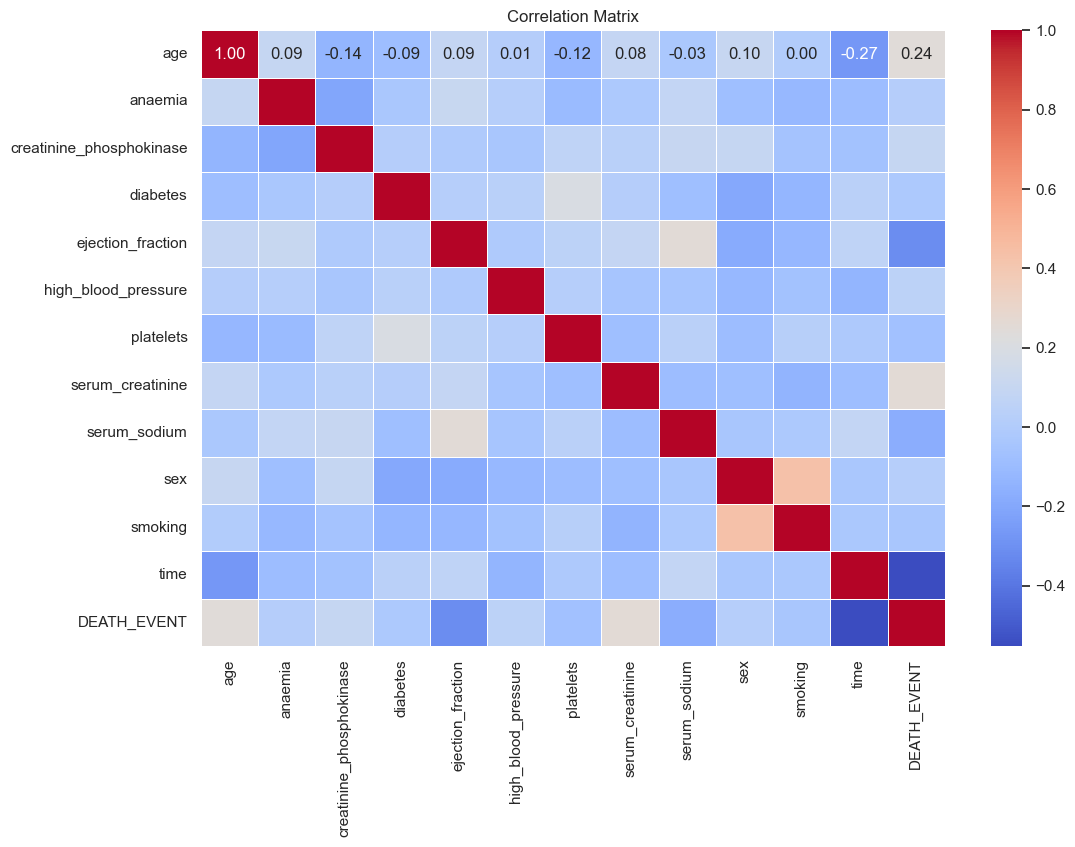

In [8]:
# Correlation Analysis
corr_matrix = heart_data_upsample.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Interpretation
Moderate Positive Correlation is seen between these variables  :
1. Age - Death_Event
2. Ejection_Fraction - Serium_Sodium_Level
3. Serum_Creatinine - Death_Event
4. Sex(Male) - Smoking
5. diabetes(Yes) - platelets

Moderate Negative Correlation is seen between  these variables :
1. Time for follow ups - Age
2. Time for follow ups - Death_Event
3. Ejection_Fraction - Death_Event
   

#### Step 8: Create a pairplot to visualize the relationship between different features

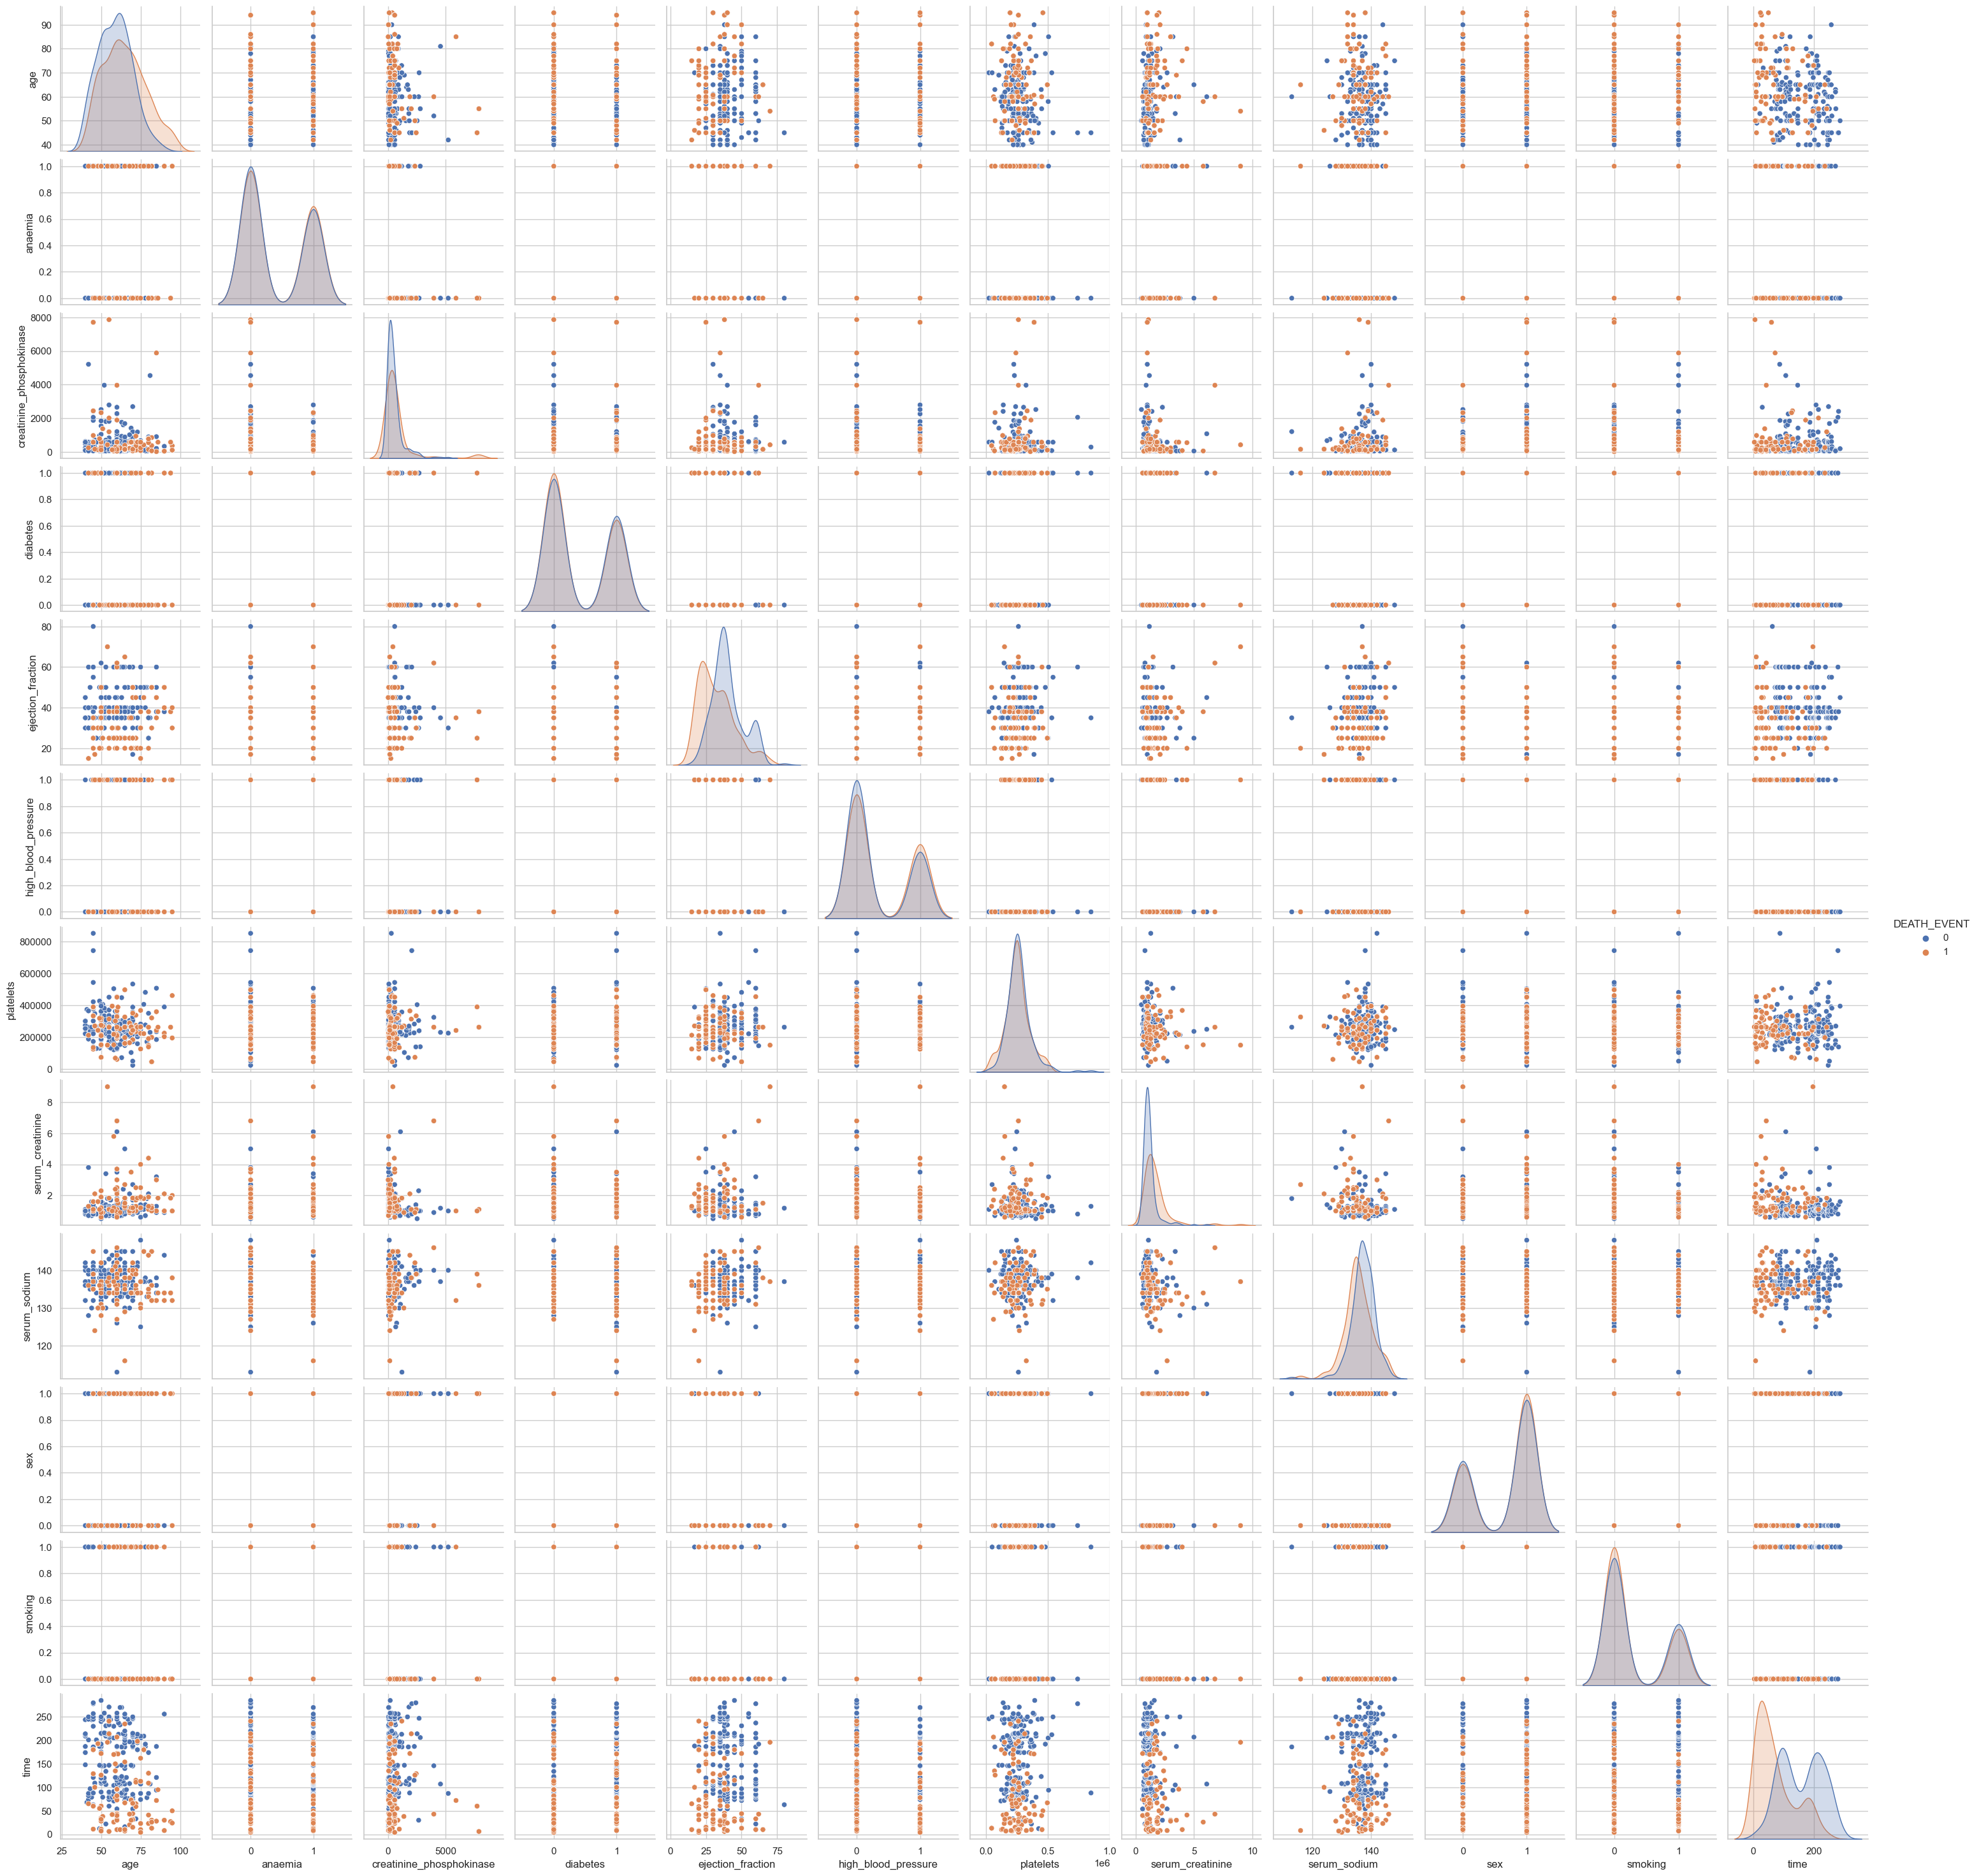

In [9]:
# Pairplot
sns.pairplot(heart_data_upsample, hue='DEATH_EVENT', diag_kind='kde')
plt.show()

#### Interpretation
Pair plots are signifying no strong correlations between the variables . Hence we can use all these variables for building the model to predict the death event .

### ML model using Logistic Regression to predict Death Event based on the features given in the dataset

#### Step 1: Split the Data into Training and Testing Sets

Split the dataset into features (X) and target (y), then into training and testing sets

In [10]:
# Define features and target variable
X = heart_data_upsample.drop(columns='DEATH_EVENT')
y = heart_data_upsample['DEATH_EVENT']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 2: Train a Classification( Logistic Regression ) Model

In [11]:
# Create the model
model = LogisticRegression(max_iter=1000)
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Step 3: Evaluate the Model on test data from dataset

In [12]:

# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7926829268292683
Confusion Matrix:
[[35 12]
 [ 5 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        47
           1       0.71      0.86      0.78        35

    accuracy                           0.79        82
   macro avg       0.79      0.80      0.79        82
weighted avg       0.81      0.79      0.79        82



The model has a higher precision for class 0 (no death) at 88%, meaning it makes fewer false positive errors for this class.


The recall for class 1 (death) is higher at 86%, indicating the model is good at identifying actual death cases.


The F1-scores for both classes are fairly balanced (0.80 for class 0 and 0.78 for class 1), suggesting the model performs reasonably well for both classes.


The overall accuracy is 79%, and the macro and weighted averages show that the model's performance is balanced across the two classes, though slightly better for class 0.



### Summary

The primary objective of this project is to develop a machine learning model capable of accurately predicting the DEATH_EVENT in patients with heart failure. The dataset is inherently imbalanced, with a higher number of patients not experiencing a death event compared to those who do. To address this imbalance, we employed an upsampling technique on the minority class to create a balanced training dataset.

We used logistic regression as our classification algorithm due to its simplicity and interpretability. The dataset was split into training and testing sets to evaluate the model's performance. After training the model, we assessed its accuracy, precision, recall, and F1-score using a confusion matrix and classification report.

Our results indicate that the logistic regression model performs reasonably well, with an overall accuracy of 79%. The model demonstrates good recall for the death event class, correctly identifying 86% of the actual death cases. Precision for the no death class is high at 88%, suggesting the model is effective at minimizing false positive predictions for this class.

### Conclusion

In this project, we developed a logistic regression model to predict death events in patients with heart failure using a dataset containing various clinical and laboratory features. Despite the inherent imbalance in the dataset, our approach of upsampling the minority class enabled us to create a balanced training dataset and achieve a reasonably accurate predictive model.

Our logistic regression model achieved an overall accuracy of 79%, with a recall of 86% for the death event class, indicating its effectiveness in identifying patients at high risk of mortality. The precision for the no death class was high at 88%, suggesting the model's ability to minimize false positive predictions. These results demonstrate the potential of logistic regression in clinical decision-making processes to identify patients at risk of adverse outcomes and facilitate timely interventions.

### Recommendations

While our logistic regression model performed well, there are several recommendations for further improving the model and its applicability:

1. **Feature Engineering**: Enhance the model by creating new features or transforming existing ones to capture more complex relationships in the data. For example, interaction terms between variables or time-based features could be explored.

2. **Advanced Modeling Techniques**: Experiment with more complex models such as random forests, gradient boosting machines, or neural networks. These models can capture non-linear relationships and interactions between features, potentially improving predictive performance.

3. **Hyperparameter Tuning**: Conduct thorough hyperparameter tuning using techniques like grid search or randomized search to optimize the performance of the logistic regression model or any advanced models used.

4. **Cross-Validation**: Implement cross-validation to ensure the model's performance is consistent across different subsets of the data and to prevent overfitting.

5. **Addressing Class Imbalance**: Beyond upsampling, explore other techniques to handle class imbalance, such as SMOTE (Synthetic Minority Over-sampling Technique) or cost-sensitive learning, which can further enhance model performance.

6. **Larger and More Diverse Datasets**: Incorporate additional data from diverse sources to improve the generalizability of the model. Larger datasets can help the model learn better and perform more reliably in real-world scenarios.

7. **Clinical Validation**: Collaborate with healthcare professionals to validate the model's predictions in a clinical setting. This step is crucial to ensure the model's practical applicability and reliability in real-world medical practice.

8. **Interpretability and Explainability**: Focus on making the model interpretable for clinicians. Techniques like SHAP (SHapley Additive exPlanations) values can help explain the model's predictions, making it easier for healthcare providers to trust and use the model in their decision-making process.

By following these recommendations, the predictive model can be refined and its performance improved, ultimately contributing to better management and care of patients with heart failure.